## Problem 16
### A)

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def create_A_b(n):
    A = np.zeros((n,n))
    b = np.empty((n,1))
   
    for i in range(len(A)):
        A[i,i] = 2.01   # i=j

        for j in range(len(A)):
            if(i == j+1):
                A[i,j] = -1
            if(i == j-1):
                A[i,j] = -1

    # b creation
        b[i][0] = (1/100)*(math.sin(2*i*math.pi/50))   
    return A,b


def jacobi_randomXnot(A,b,stepNumber):
    x = np.random.rand(len(b),1)
    u = np.zeros((len(b),1))
    A_nodaig = np.copy(A)
    temp = np.arange(0,len(A))
    A_nodaig[temp,temp] = 0    

    for k in range(0,stepNumber):
        for i in range(len(A)):
            u[i,0] = (1/A[i,i])*(b[i,0] - np.sum(np.matmul(A_nodaig[i],x))) #(1/aii)(bi - sum(aij*xj))
        x = np.copy(u)

    return x


In [5]:
Ab = create_A_b(5)
jacobi_randomXnot(Ab[0],Ab[1],15)


array([[0.03560611],
       [0.08552933],
       [0.07401939],
       [0.08872267],
       [0.03957281]])

### B)

In [75]:
from cProfile import label
from turtle import color


def jacobi_plot(A,b,stepNumber):
    plotMe = np.array([0,2,5,10,20,50,100,200])
    colorMe = np.array(['blue','green','red','yellow','black','orange','pink','purple'])
    x = np.random.rand(len(b),1)
    u = np.zeros((len(b),1))
    A_nodaig = np.copy(A)
    temp = np.arange(0,len(A))
    A_nodaig[temp,temp] = 0    

    fig, ax = plt.subplots(1,1)

    for k in range(0,stepNumber):
        for i in range(len(A)):
            u[i,0] = (1/A[i,i])*(b[i,0] - np.sum(np.matmul(A_nodaig[i],x))) #(1/aii)(bi - sum(aij*xj))
            if(len(np.where(plotMe == k)[0]) > 0):
                #plt.plot(i,u[i,0],'o',c=colorMe[np.where(plotMe == k)[0][0]],label=str(k))
                ax.scatter(i,u[i,0],color = colorMe[np.where(plotMe == k)[0][0]])

        x = np.copy(u)

    plt.xlabel('i')
    plt.ylabel('(x^(k))i')
    plt.title('xki\'s against i\'s for k=[0,2,5,10,20,50,100,200] \n with corresponding colors [\'blue\',\'green\',\'red\',\'yellow\',\'black\',\'orange\',\'pink\',\'purple\']')


   



    plt.show()

    

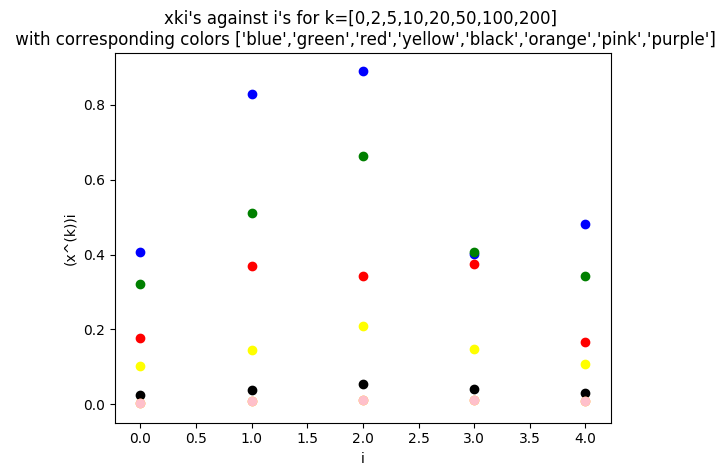

In [76]:
Ab = create_A_b(5)
jacobi_plot(Ab[0],Ab[1],200)

From the plot above we can observe the values of $(x^{(k)})_{i}$ gets closer and closer to zero as the number of iterations increases for all the is. This even occurs fairly evenly when the starting values are different. In other words the $(x^{(k)})_{i}$s for some value k seem to get closer and closer to equal as k increases.